# AIDA Data Cleansing Workshop

Today we're going to introduce how to work with datasets in Python using [Pandas](https://pandas.pydata.org/). Arguably the most important, widely-used framework for data science in Python!

## Loading a dataset

To start, let's load in the dataset we are going to be working with. It's a spreadsheet put out by the University of Illinois that you can take a look at [here]('http://dmi.illinois.edu/stuenr/ethsexres/ethsexfa19.xls'). It may even help you to open it in Excel first! We'll be looking at the `summary` sheet within the workbook.

The dataset represents student demographics across the various departments for Fall 2019. Each cell in the `summary` sheet offers a count of how many students represent the demographic specified in the column for students in the department specified by the row.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
stu19 = pd.read_excel('http://dmi.illinois.edu/stuenr/ethsexres/ethsexfa19.xls', sheet_name='summary')
stu19

,"Summary of enrollment by college, level, gender, race/ethnicity, and enrollment status",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,* This section uses the new Federal IPEDS guidelines for reporting racial and ethnic data.,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Fall 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"For more information on these guidelines, s...",NaN,NaN,NaN,http://www.vpaa.uillinois.edu/RaceEthnicity/in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"PUBLICATION DATE: September 12, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All students including multiracial and Hispanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Term/Year Code,College,NaN,Student level,Total,By Gender,NaN,NaN,By Self-reported Race/Ethnicity (NEW*),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,By Residency,NaN,By Enrollment status,NaN
3,NaN,Code,Name,NaN,NaN,Men,Women,Unknown,Caucasian,Asian American,African American,Hispanic,Native American,Hawaiian/Pacific Isl,Multiracial,International,Unknown,All African American,All Native American,All Hawaiian/ Pac Isl,All Asian,Illinois,Non-Illinois,Part time,Full time
4,120198,KL,"Agr, Cons, Env Sci",Graduate,745,302,442,1,375,29,15,41,0,0,14,246,25,21,7,1,44,261,484,187,558
5,120198,KL,"Agr, Cons, Env Sci",Undergraduate,2801,1217,1579,5,1585,256,189,450,0,1,74,227,19,241,31,9,309,2410,391,109,2692
6,120198,KM,Business,Graduate,4142,2535,1598,9,1623,621,188,227,3,4,67,732,677,268,36,13,1054,1162,2980,706,3436
7,120198,KM,Business,Undergraduate,3115,1741,1374,0,1440,605,101,289,1,2,80,568,29,126,15,16,680,2290,825,28,3087
8,120198,KN,Education,Graduate,1158,356,799,3,637,61,182,113,1,1,23,80,60,209,21,1,92,596,562,315,843
9,120198,KN,Education,Undergraduate,589,78,511,0,361,58,40,100,0,1,16,12,1,55,10,3,65,554,35,6,583


Well that doesn't look great! Let's break down what happened.

We used Pandas `read_excel` function to load our dataset from the web into a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). A DataFrame is a way to represent tabular data, think about it as a programatic version of a spreadsheet for Python. We can filter, sort, copy, or do just about anything we want to them, you just have to know what you want to do first! A DataFrame is the basis for any analysis project.

For our dataset, we passed in the parameter `sheet_name='summary'`, as that was the sheet within the excel workbook we wanted to load.

So what's wrong with our data? Well if you open it in excel you'll notice that the format isn't standard. There are multiple rows of "headers" for our data, and we need to tell Pandas where our data actually starts. If you count in the dataset, you'll see 12 rows of headers. Fortunately, if we look at the [Pandas documentation for `read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) we'll see it accepts a `header` parameter to specify which row the data starts on. Let's try it out!

In [0]:
stu19 = pd.read_excel('http://dmi.illinois.edu/stuenr/ethsexres/ethsexfa19.xls', sheet_name='summary', header=4)
stu19.head(5)  # The function head(5) tell Pandas to only return the first 5 rows

,Unnamed: 0,Code,Name,Unnamed: 3,Unnamed: 4,Men,Women,Unknown,Caucasian,Asian American,African American,Hispanic,Native American,Hawaiian/Pacific Isl,Multiracial,International,Unknown.1,All African American,All Native American,All Hawaiian/ Pac Isl,All Asian,Illinois,Non-Illinois,Part time,Full time
0,120198,KL,"Agr, Cons, Env Sci",Graduate,745,302,442,1,375,29,15,41,0,0,14,246,25,21,7,1,44,261,484,187,558
1,120198,KL,"Agr, Cons, Env Sci",Undergraduate,2801,1217,1579,5,1585,256,189,450,0,1,74,227,19,241,31,9,309,2410,391,109,2692
2,120198,KM,Business,Graduate,4142,2535,1598,9,1623,621,188,227,3,4,67,732,677,268,36,13,1054,1162,2980,706,3436
3,120198,KM,Business,Undergraduate,3115,1741,1374,0,1440,605,101,289,1,2,80,568,29,126,15,16,680,2290,825,28,3087
4,120198,KN,Education,Graduate,1158,356,799,3,637,61,182,113,1,1,23,80,60,209,21,1,92,596,562,315,843


That looks better, but what's wrong with some of our column names? Well if we look at the dataset we'll notice that the column headers are not all in the same row. So while our data now starts from the right spot, Pandas has no idea it was supposed to get the column names from the headers above.

Sometimes we can fix this by telling Pandas which rows to get column names from using different parameters. In our case we're going to set our column names manually for simplicity, however this is not the only way to fix it.

In [0]:
stu19 = pd.read_excel('http://dmi.illinois.edu/stuenr/ethsexres/ethsexfa19.xls',
                      header=4, sheet_name="summary",
                      names=["term", "code", "name", "st_level", "total", "men", "women", "unknown_gender",
                             "caucasian", "asian_american", "african_american", "hispanic", "native_american",
                             "hawaiian_pacificisl", "multiracial", "international", "unknown_race",
                             "all_african_american", "all_native_american", "all_hawaiian_pacificisl",
                             "all_asian", "illinois", "non_illinois", "part_time", "full_time"])
stu19.head(5)

,term,code,name,st_level,total,men,women,unknown_gender,caucasian,asian_american,african_american,hispanic,native_american,hawaiian_pacificisl,multiracial,international,unknown_race,all_african_american,all_native_american,all_hawaiian_pacificisl,all_asian,illinois,non_illinois,part_time,full_time
0,120198,KL,"Agr, Cons, Env Sci",Graduate,745,302,442,1,375,29,15,41,0,0,14,246,25,21,7,1,44,261,484,187,558
1,120198,KL,"Agr, Cons, Env Sci",Undergraduate,2801,1217,1579,5,1585,256,189,450,0,1,74,227,19,241,31,9,309,2410,391,109,2692
2,120198,KM,Business,Graduate,4142,2535,1598,9,1623,621,188,227,3,4,67,732,677,268,36,13,1054,1162,2980,706,3436
3,120198,KM,Business,Undergraduate,3115,1741,1374,0,1440,605,101,289,1,2,80,568,29,126,15,16,680,2290,825,28,3087
4,120198,KN,Education,Graduate,1158,356,799,3,637,61,182,113,1,1,23,80,60,209,21,1,92,596,562,315,843


Perfect! Now we have our data. Let's see what we can learn about it

## Basic Analysis

We're going to introduce some of the most important functions for analyzing a dataset. The first one is the `describe` function. Take a look at the [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) to see how it works!

The `describe` function gives us a ton of useful statistical "instruments" on our data. You should recognize most of them. `count` tells us the number of rows, `std` is the standard deviation, `25%, 50%, 75%` represent the respective [quartiles](https://en.wikipedia.org/wiki/Quartile) of the dataset. This is super useful when our columns contain _numerical_ data. Take a look at what we get and see if anything pops out at you.

In [0]:
stu19.describe()

,term,total,men,women,unknown_gender,caucasian,asian_american,african_american,hispanic,native_american,hawaiian_pacificisl,multiracial,international,unknown_race,all_african_american,all_native_american,all_hawaiian_pacificisl,all_asian,illinois,non_illinois,part_time,full_time
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,120198.0,1706.533333,919.400000,785.800000,1.333333,704.600000,263.133333,93.833333,177.466667,0.633333,0.933333,48.800000,360.300000,56.833333,118.966667,16.233333,6.733333,330.933333,994.933333,711.600000,126.033333,1580.500000
std,0.0,2596.898823,1564.294059,1141.339878,2.154920,994.861335,558.127580,160.626378,312.958049,0.808717,1.638614,87.388708,628.978929,147.305005,197.453178,22.934214,13.009104,654.534577,1816.593021,1124.038182,205.603315,2497.269609
min,120198.0,7.000000,3.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,120198.0,245.750000,52.250000,158.750000,0.000000,116.750000,16.500000,9.750000,14.250000,0.000000,0.000000,6.000000,15.000000,3.000000,13.000000,2.500000,0.000000,22.000000,79.500000,90.000000,7.750000,141.750000
50%,120198.0,659.500000,246.000000,456.500000,0.500000,368.000000,31.500000,33.000000,55.000000,0.000000,0.000000,14.500000,74.000000,11.000000,44.000000,8.500000,1.000000,43.000000,313.500000,220.500000,37.000000,570.500000
75%,120198.0,2486.000000,1105.500000,1122.000000,1.000000,918.500000,250.000000,116.750000,217.750000,1.000000,1.000000,65.750000,285.750000,28.000000,166.500000,23.750000,8.000000,306.500000,1092.250000,526.750000,146.500000,2382.250000
max,120198.0,12252.000000,6156.000000,6090.000000,9.000000,4865.000000,2370.000000,817.000000,1597.000000,3.000000,7.000000,427.000000,2400.000000,677.000000,1007.000000,118.000000,61.000000,2755.000000,9121.000000,3990.000000,875.000000,11924.000000


Some comments here: 
- Take a look at those standard deviations; they're huge! That means there's a ton of variance in the number of students from a certain gender across departments. Why might that be? Well think back to what our data represents. Each row contains raw counts across demographics for that specific department. So, while the Grainger College of Engineering has 7,129 undergraduates total, Carle Illinois Medicine only has 61! Perhaps a more useful statistic here could be the ratios of students in the demographic to the total
- What's up with that term column and why are all the values `120198`. If we read the description in the dataset, we see that it's a special code or identifier for the `Fall 2019` term. So its described value isn't very useful.
- We have groups of columns. There are 3 for gender, 13 for race/ethnicity, 2 for residency, and 2 for enrollment status. We should break our dataframe into smaller dataframes based on this grouping

## Selecting Columns

Like we discussed above, we want to break our dataframe into 4 separate dataframes based on the category of the demographic. By checking the [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) on indexing and selecting dataframes, we find out how to do that. Give it a shot! We did the first one for you.

In [0]:
stu_genders = stu19[['term', 'code', 'name', 'st_level', 'total', 'men', 'women', 'unknown_gender']]
stu_races = stu19[['term', 'code', 'name', 'st_level', 'total', "caucasian", "asian_american", "african_american", "hispanic", "native_american",
                             "hawaiian_pacificisl", "multiracial", "international", "unknown_race",
                             "all_african_american", "all_native_american", "all_hawaiian_pacificisl",
                             "all_asian"]]
# TODO: Assign the rest!
stu_residency = stu19[['term', 'code', 'name', 'st_level', 'total', 'illinois', 'non_illinois']]
stu_enrollment = stu19[['term', 'code', 'name', 'st_level', 'total', 'part_time', 'full_time']]

## Creating New Columns
As we discussed earlier, it would be more useful to see data on the ratios between demographics. Let's do that! We'll add new columns for the ratio of each demographic to the total.

In [0]:
stu_genders['women_pct'] = stu_genders['women'] / stu_genders['total'] * 100
stu_genders.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,term,code,name,st_level,total,men,women,unknown_gender,women_pct
0,120198,KL,"Agr, Cons, Env Sci",Graduate,745,302,442,1,59.328859
1,120198,KL,"Agr, Cons, Env Sci",Undergraduate,2801,1217,1579,5,56.372724
2,120198,KM,Business,Graduate,4142,2535,1598,9,38.580396
3,120198,KM,Business,Undergraduate,3115,1741,1374,0,44.109149
4,120198,KN,Education,Graduate,1158,356,799,3,68.998273


In the above we added a new column `women_pct` formed by dividing the row's number of `women` by the row's `total`. When we do arithmetic on columns of dataframes, the operation happens *row-wise*. That is, each row in our new column is formed by dividing the two values in the same row.

Go ahead and add the `men_pct` and `unknown_gender_pct` columns to the `stu_genders` dataframe like we did above.

In [0]:
# TODO: create the columns!
stu_genders['men_pct'] = stu_genders['men'] / stu_genders['total'] * 100
stu_genders['unknown_gender_pct'] = stu_genders['unknown_gender'] / stu_genders['total'] * 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Great, now let's take another look at our data

In [0]:
stu_genders.describe()

,term,total,men,women,unknown_gender,women_pct,men_pct,unknown_gender_pct
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,120198.0,1706.533333,919.400000,785.800000,1.333333,57.099894,42.605420,0.294687
std,0.0,2596.898823,1564.294059,1141.339878,2.154920,17.239761,17.153873,0.758130
min,120198.0,7.000000,3.000000,4.000000,0.000000,21.858903,12.500000,0.000000
25%,120198.0,245.750000,52.250000,158.750000,0.000000,44.638466,31.833850,0.000000
50%,120198.0,659.500000,246.000000,456.500000,0.500000,56.757791,43.152956,0.007014
75%,120198.0,2486.000000,1105.500000,1122.000000,1.000000,67.971849,54.663236,0.207592
max,120198.0,12252.000000,6156.000000,6090.000000,9.000000,87.500000,78.118701,3.773585


Great, now we see that 57% of the University is women and 42% is men with a standard deviation of 17%... right?

STOP! 

Did you catch what we did wrong there? If not, this is an important lesson in data analytics. ***You always need to know what your data means***.

So what did we do wrong? Let's go back to what our data is...

In [0]:
stu_genders.head(5)

,term,code,name,st_level,total,men,women,unknown_gender,women_pct,men_pct,unknown_gender_pct
0,120198,KL,"Agr, Cons, Env Sci",Graduate,745,302,442,1,59.328859,40.536913,0.134228
1,120198,KL,"Agr, Cons, Env Sci",Undergraduate,2801,1217,1579,5,56.372724,43.448768,0.178508
2,120198,KM,Business,Graduate,4142,2535,1598,9,38.580396,61.202318,0.217286
3,120198,KM,Business,Undergraduate,3115,1741,1374,0,44.109149,55.890851,0.000000
4,120198,KN,Education,Graduate,1158,356,799,3,68.998273,30.742660,0.259067


The percent values and totals for each row represents the percentages for *that row only*. Put another way, we computed our ratios compared to the total for that row and not the entire dataset. So in the first row, we have 59% women and 41% men across *Graduate students in the Agriculture department* and not across *all of our data*. 

How can we figure out the aggregate data for the whole dataset then?

## Aggregations
Let's compute how many women, men, and unknowns there are in our whole dataset.

Again, we look to the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

In [0]:
total_men = stu_genders['men'].sum()
total_women = stu_genders['women'].sum()
total_students = stu_genders['total'].sum()
print(f'total: {total_students}, men: {total_men}, women: {total_women}')

total: 51196, men: 27582, women: 23574


Now we see how dangerous our misunderstanding in the last section was! Without being careful, we may have reported that 57% of all students are women, but here we see that there are actually significantly more men.

What if we wanted to see different breakdowns? How about ratios by department or by student level (graduate vs. undergraduate).

## Setting a New Index

We'll again reference the [Pandas selection/indexing docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) as we did above. In effect, we want to combine groups of rows together and look at the new totals. 

We'll do this by setting an _index_ on the column we want, in this case `name` which corresponds to the name of the department. However, indices need to be unique. Each distinct `name` actually has 2 rows: 1 for undergraduate and 1 for graduate in the `st_level` column. So we actually need to create a [`MultiIndex`](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html). We can do that with the [`set_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html) method, which converts columns to indexes

In [0]:
# Here we don't want our pct columns anymore as we figured out earlier
stu_genders_by_dept = stu_genders[['name', 'st_level', 'total', 'men', 'women', 'unknown_gender']]

# Let's set a new index
stu_genders_by_dept.set_index(keys=['name', 'st_level'], inplace=True)
stu_genders_by_dept.head(6)

total   men  women  unknown_gender
name                st_level                                          
Agr, Cons, Env Sci  Graduate          745   302    442               1
                    Undergraduate    2801  1217   1579               5
Business            Graduate         4142  2535   1598               9
                    Undergraduate    3115  1741   1374               0
Education           Graduate         1158   356    799               3
                    Undergraduate     589    78    511               0

To select a row by its index, we can use the `.loc` function.

In [0]:
stu_genders_by_dept.loc['Business ', 'Graduate ']

total             4142
men               2535
women             1598
unknown_gender       9
Name: (Business , Graduate ), dtype: int64

Notice how we have the extra space in our indexing... That's annoying that our data has that extra space. We should fix that!

By googling "remove whitespace from pandas column" we find a convenient function `str.strip()`

In [0]:
# Cleaning up our data
stu_genders['name'] = stu_genders['name'].str.strip()
stu_genders['st_level'] = stu_genders['st_level'].str.strip()

# Setting new MultiIndex like before
stu_genders_by_dept = stu_genders[['name', 'st_level', 'total', 'men', 'women', 'unknown_gender']]
stu_genders_by_dept.set_index(keys=['name', 'st_level'], inplace=True)
stu_genders_by_dept.head(6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


total   men  women  unknown_gender
name               st_level                                         
Agr, Cons, Env Sci Graduate         745   302    442               1
                   Undergraduate   2801  1217   1579               5
Business           Graduate        4142  2535   1598               9
                   Undergraduate   3115  1741   1374               0
Education          Graduate        1158   356    799               3
                   Undergraduate    589    78    511               0

Now let's try indexing again. Go ahead and fetch all values for 'Business'

In [0]:
# TODO: Index the data by name!
stu_genders_by_dept.loc['Business']

,total,men,women,unknown_gender
st_level,,,,
Graduate,4142,2535,1598,9
Undergraduate,3115,1741,1374,0


Great! Now it's your turn to try creating an index. Go ahead and create the inverse of what we did above. That is, we want to create a new dataframe `stu_genders_by_st_level` from our original dataset `stu_genders`. The new dataframe will have its first index on `st_level` and its second index on `name`, the inverse of what we did before!

In [0]:
# TODO: Create the new df 
stu_genders_by_st_level = stu_genders[['name', 'st_level', 'total', 'men', 'women', 'unknown_gender']]

# TODO: Set the proper MultiIndex for the dataframe
stu_genders_by_st_level = stu_genders_by_st_level.set_index(keys=['st_level', 'name'])

# TODO: Try indexing into the new dataframe as well
stu_genders_by_st_level.loc['Graduate']

,total,men,women,unknown_gender
name,,,,
"Agr, Cons, Env Sci",745,302,442,1
Business,4142,2535,1598,9
Education,1158,356,799,3
Grainger Engineering,4465,3488,976,1
Fine & Applied Arts,730,333,397,0
Graduate College,58,36,22,0
Media,145,42,102,1
Law,102,52,50,0
Liberal Arts & Sci,2632,1320,1311,1


## Sorting our Data

Let's do something simple, like sorting our data by the 'total' field

Again, we look to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [0]:
stu_genders_by_dept.sort_values(by='total')

,,total,men,women,unknown_gender
name,st_level,,,,
Provost & VC Acad Affairs,Undergraduate,7,3,4,0
Graduate College,Graduate,58,36,22,0
Carle Illinois Medicine,Professional,61,36,24,1
Veterinary Medicine,Graduate,90,34,56,0
Law,Graduate,102,52,50,0
Center Innov in Teach Learn,Undergraduate,106,53,49,4
Media,Graduate,145,42,102,1
Center Innov in Teach Learn,Graduate,241,85,153,3
Labor & Empl. Rel.,Graduate,260,69,191,0


That did what we wanted, but notice the side effect. We no longer are sorted by the `name` index. Maybe instead we should keep our group by `name` and sort by the aggregate total between `undergraduate` and `graduate`.

To do this, let's create a new column `agg_total` that represents the total sum between undergraduate/graduates

In [0]:
stu_genders_by_dept['agg_total'] = stu_genders_by_dept.groupby(by='name').transform(sum)['total']
stu_genders_by_dept.head(6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


total   men  women  unknown_gender  agg_total
name               st_level                                                    
Agr, Cons, Env Sci Graduate         745   302    442               1       3546
                   Undergraduate   2801  1217   1579               5       3546
Business           Graduate        4142  2535   1598               9       7257
                   Undergraduate   3115  1741   1374               0       7257
Education          Graduate        1158   356    799               3       1747
                   Undergraduate    589    78    511               0       1747

Awesome, now we can do a multi-level sort! First on `agg_total` then on `st_level`

In [0]:
stu_genders_by_dept.sort_values(by=['agg_total', 'st_level'], inplace=True)
stu_genders_by_dept

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


total  ...  agg_total
name                           st_level              ...           
Provost & VC Acad Affairs      Undergraduate      7  ...          7
Graduate College               Graduate          58  ...         58
Carle Illinois Medicine        Professional      61  ...         61
Labor & Empl. Rel.             Graduate         260  ...        260
Center Innov in Teach Learn    Graduate         241  ...        347
                               Undergraduate    106  ...        347
Law                            Graduate         102  ...        522
                               Professional     420  ...        522
Veterinary Medicine            Graduate          90  ...        636
                               Professional     546  ...        636
School of Social Work          Graduate         384  ...        650
                               Undergraduate    266  ...        650
School of Information Sciences Graduate         841  ...        841
Media                          Graduate         145  ...       1150
                               Undergraduate   1005  ...       1150
Education                      Graduate        1158  ...       1747
                               Undergraduate    589  ...       1747
Applied Health Sci             Graduate         326  ...       2374
                               Undergraduate   2048  ...       2374
Fine & Applied Arts            Graduate         730  ...       2497
                               Undergraduate   1767  ...       2497
General Studies                Undergraduate   2765  ...       2765
Agr, Cons, Env Sci             Graduate         745  ...       3546
                               Undergraduate   2801  ...       3546
Business                       Graduate        4142  ...       7257
                               Undergraduate   3115  ...       7257
Grainger Engineering           Graduate        4465  ...      11594
                               Undergraduate   7129  ...      11594
Liberal Arts & Sci             Graduate        2632  ...      14884
                               Undergraduate  12252  ...      14884

[30 rows x 5 columns]

## Plotting our Data

We'll focus next week on advanced plotting and how to do it, but for now let's just try and get something simple.

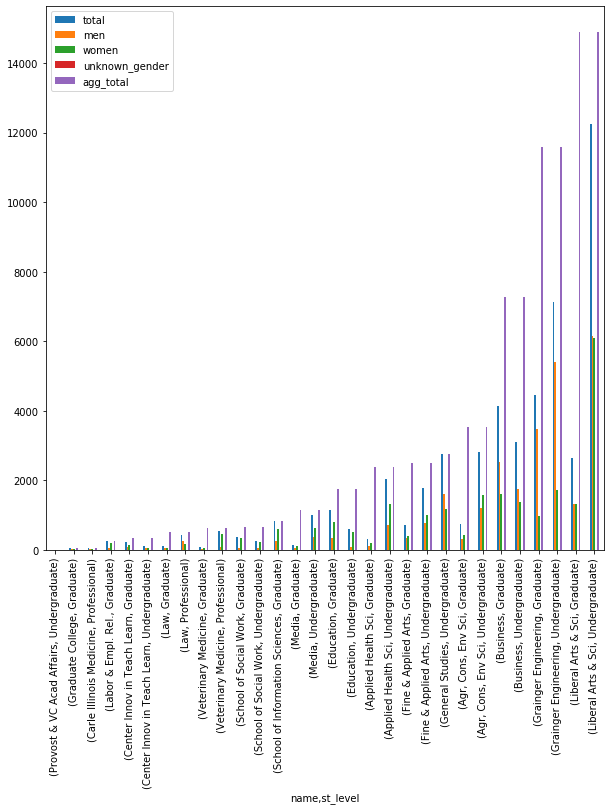

In [0]:
stu_genders_by_dept.plot.bar(figsize=[10, 10])

Okay great, that's something! Maybe we want to see a little less data in our plot though. For now, let's just look at the total between undergraduates and graduates in each department

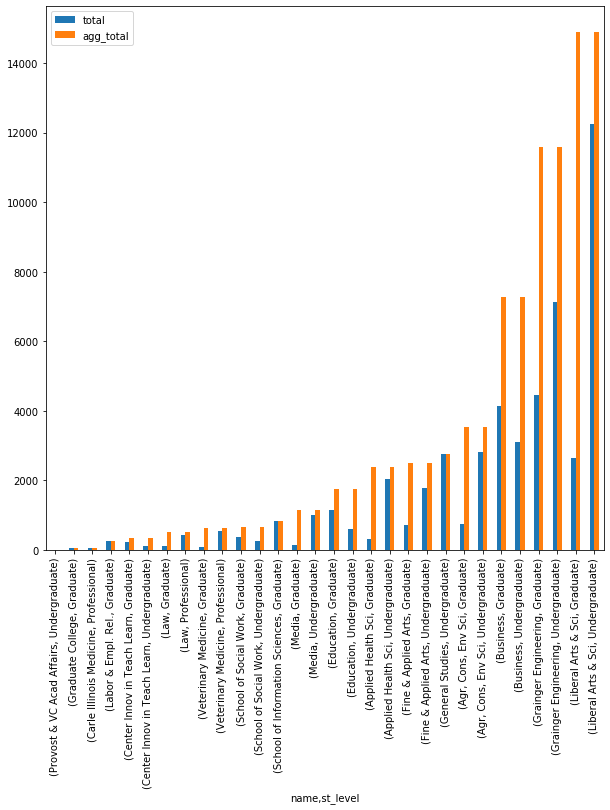

In [0]:
stu_genders_by_dept[['total', 'agg_total']].plot.bar(figsize=[10, 10])